In [1]:
### Import as many items as possible to have available.
### Import data from CSV
# encoding: utf-8
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv('data/Influence_clean.csv', header=0,encoding= 'utf-8',  delimiter='|')
data['minreleasedate'] = pd.to_datetime(pd.Series(data.minreleasedate))
data['times_covered'].fillna(0, inplace=True)
data['artistid'] = data.artist.map({'The Beatles':0, 'The Rolling Stones':1})

In [49]:
data['artist'] = data.artist.astype('category')
data['songname'] = data.songname.astype('category')
data['year'] = data['minreleasedate'].apply(lambda x: x.year)

In [3]:
#feature_cols = [ 'minreleasedate','num_releases', 'countries', 'avg_rating','title_sent', 'lyric_sent','is_cover']
feature_cols = [ 'artistid','num_releases','lyric_sent','title_sent', 'countries', 'avg_rating','is_cover']
X= data[data.is_cover == 0][feature_cols]
y = data[data.is_cover == 0].times_covered


In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
rfreg = RandomForestClassifier(n_estimators=500, max_features=4, oob_score=True, random_state=1)
rfreg.fit(X, y)
rfreg.oob_score_

0.14869888475836432

In [5]:
feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
Acc_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=500, max_features=feature, random_state=1)
    acc_val_scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    Acc_scores.append(acc_val_scores.mean())

/Users/maxrose/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


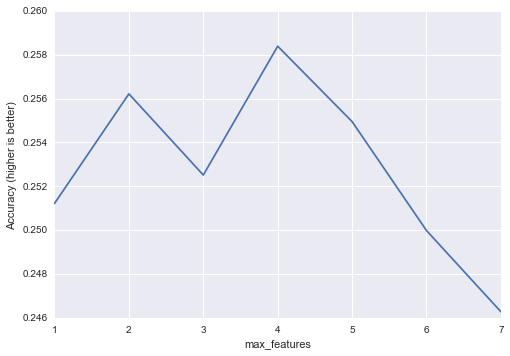

In [6]:
# plot max_features (x-axis) versus RMSE (y-axis)
plt.plot(feature_range, Acc_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy (higher is better)')

In [8]:
data.head()

,workid,artist,songname,minreleasedate,num_releases,countries,avg_rating,lyrics,title_sent,lyric_sent,is_cover,artist_cnt,cov_rating_avg,times_covered,artistid
0,3631,The Beatles,Tomorrow Never Knows,1966-08-05,4,3,60,Turn off your mind Relax and float down stream...,0.0,-0.101587,0,47.0,84.0,50.0,0
1,6794,The Beatles,Only a Northern Song,1969-01-13,3,3,0,If you're listening to this song You may think...,0.0,-0.045179,0,2.0,0.0,2.0,0
2,6795,The Beatles,All Together Now,1969-01-13,3,3,0,"One, two, three, four Can I have a little more...",0.0,0.122569,0,7.0,0.0,7.0,0
3,6796,The Beatles,Hey Bulldog,1969-01-13,3,3,0,Sheepdog standing in the rain Bullfrog doing i...,0.0,0.129570,0,17.0,40.0,17.0,0
4,6797,The Beatles,It’s All Too Much,1969-01-13,3,3,0,NaN,0.2,0.000000,0,14.0,0.0,14.0,0


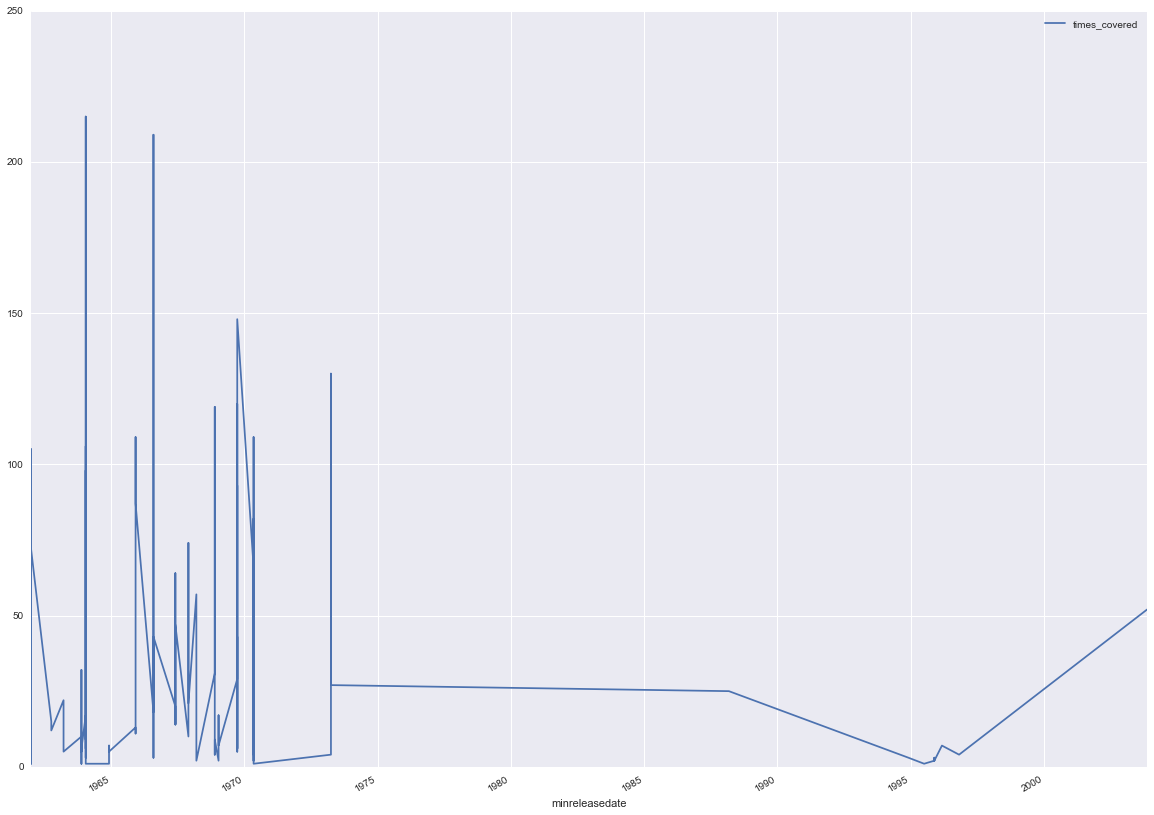

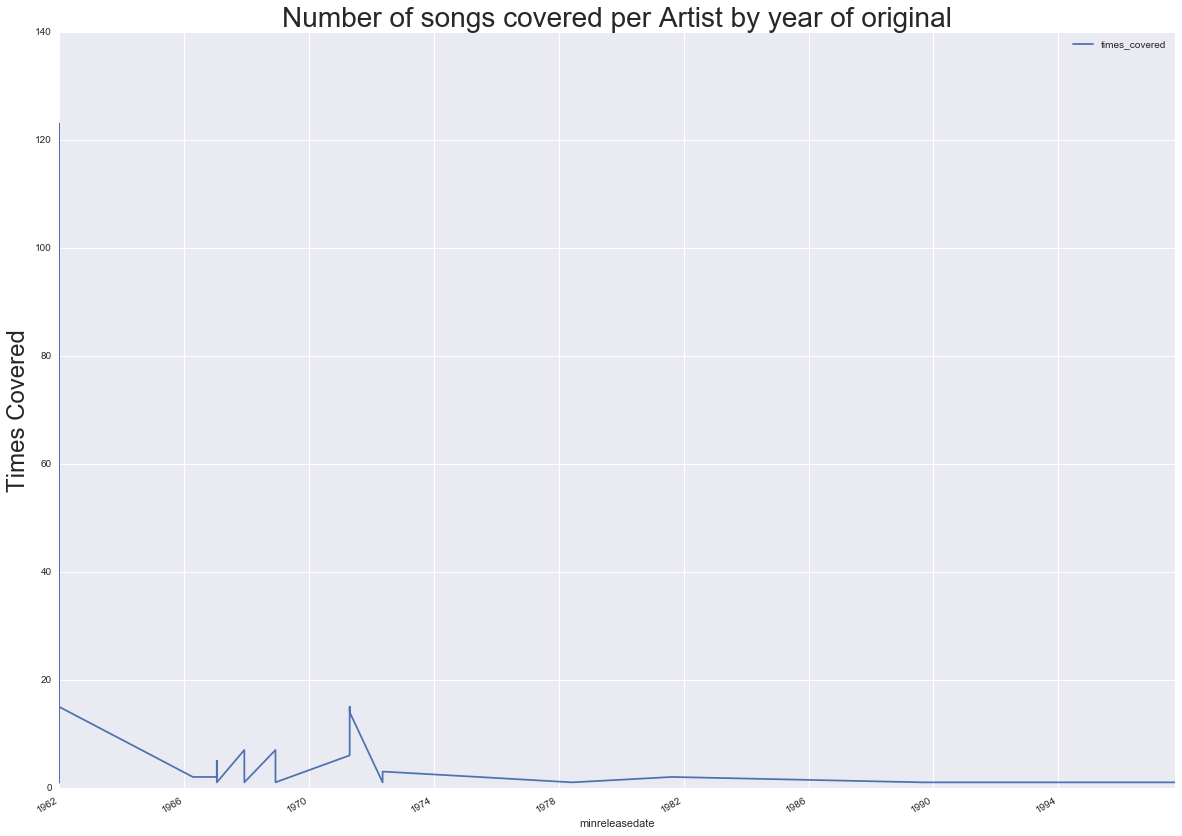

In [29]:
data[data.times_covered > 0].groupby('artist').plot(x='minreleasedate',y='times_covered',figsize=(20,15))
plt.title('Number of songs covered per Artist by year of original',size =28)
plt.ylabel('Times Covered', size = 24)

In [50]:
data[data.songname == 'Paint It Black']

,workid,artist,songname,minreleasedate,num_releases,countries,avg_rating,lyrics,title_sent,lyric_sent,is_cover,artist_cnt,cov_rating_avg,times_covered,artistid,year
189,2750305,The Rolling Stones,Paint It Black,1962-01-01,20,8,0,I see a red door and I want it painted black N...,-0.166667,-0.04321,0,98.0,80.0,105.0,1,1962


In [24]:
data[(data.artistid == 0) & (data.minreleasedate == '1962-01-01')].count()

workid            46
artist            46
songname          46
minreleasedate    46
num_releases      46
countries         46
avg_rating        46
lyrics            32
title_sent        46
lyric_sent        46
is_cover          46
artist_cnt        25
cov_rating_avg    25
times_covered     46
artistid          46
dtype: int64

In [56]:
data[data.is_cover .sort_values('year').groupby(['artist', 'year']).songname.count()

artist              year
The Beatles         1962    48
                    1963    16
                    1964    33
                    1965     7
                    1966    10
                    1967    15
                    1968    21
                    1969    21
                    1970    12
                    1973     6
                    1988     3
                    1994    19
                    1995    11
                    1996     5
                    2003     1
                    2006    13
The Rolling Stones  1962    51
                    1964    10
                    1965     3
                    1966     3
                    1967     8
                    1968     3
                    1969     1
                    1970     2
                    1971     4
                    1972     8
                    1974     1
                    1975     2
                    1976     1
                    1977     1
                    1978     3
              

In [39]:
data.minreleasedate.astype(object).year()

AttributeError: 'Series' object has no attribute 'year'